#### Histogram of vertex probability with original time series. The vertical scale indicates the probability that an internal vertex is in each (1 time unit) bin:

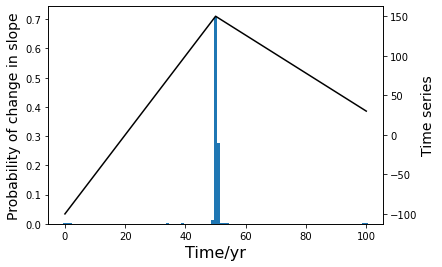

In [38]:
# Binning in code:
# bins are 0-1, 1-2, 2-3, 3-4, etc. with left edges at 0,1,2,3,4,...
# 
plt.figure()
fac = (NSAMPLE-burn_in)/THIN
left_edges = time_intervals_edges[:time_intervals_nbins] # use the left edges
ax = plt.gca()
plt.bar(left_edges, CP/fac, align='edge', width = time_intervals_edges[1:] - time_intervals_edges[0:time_intervals_nbins])
ax2 = ax.twinx()
plt.plot([0,50,100],[-100,150,30],'k');
ax.set_xlabel('Time/yr',fontsize=16)
ax.set_ylabel('Probability of change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)
plt.savefig('example1_jerk_timing.pdf',bbox_inches='tight')

In [39]:
from scipy.signal import find_peaks
peaks,_ = find_peaks(CP/fac, height=0.1)
print('Most probable change in slope is between {0:f} and {1:f}'.format
      (left_edges[peaks][0], left_edges[peaks+1][0]))

Most probable change in slope is between 49.500000 and 50.500000


#### Calculate the timeseries of the absolute change in slope from the average and median solutions

In [40]:
# Define a function to calculate the change in slope. Uses one-sided differences excluding the query point.
# This avoids the case where an apex of the function modelled, is in between two grid points x_i, and x_{i+1}. 
# Here, the left one-sided gradient at x_i, and the right one-sided gradient at x_{i+1} will be accurate, 
# but using x_i and x_{i+1} to calculate the gradient will give a large error.

def calc_delta_slope(timeseries, delta_t):
    delta_slope = np.zeros( len(timeseries) )
    
    for i in range(len(timeseries)):
        if i > 2 and i < len(timeseries)-2 :
            delta_slope[i] = abs(float(timeseries[i+2] -  timeseries[i+1] - timeseries[i-1] + timeseries[i-2]) )/delta_t
    return delta_slope

    

In [41]:
true_soln = np.interp(time_for_plotting,[0,50,100],[-100,100,0])
calc_delta_slope(true_soln,time_for_plotting[1] - time_for_plotting[0]).max()

6.000000000000099

In [42]:
print('Analytic change in slope is ', 100./50  + 200./50)

Analytic change in slope is  6.0


Peak of delta_slope for median 4.740594
Peak of delta_slope for average 4.145360
Peak of delta_slope for true solution 6.000000
Time of max delta_slope for median 50.373434
Time of max delta_slope for average 50.879699
Time of max delta_slope for true solution 50.120301


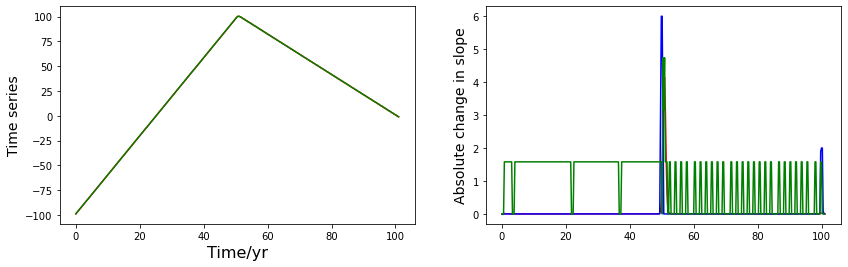

In [43]:

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

true_soln = np.interp(time_for_plotting,[0,50,100],[-100,100,0])
ax1.plot(time_for_plotting, AV,'r') 
ax.plot(time_for_plotting, true_soln,'b') 
ax1.plot(time_for_plotting, MEDIAN,'g') 

ax2.plot(time_for_plotting, calc_delta_slope(AV,time_for_plotting[1] - time_for_plotting[0]),'r') 
ax2.plot(time_for_plotting, calc_delta_slope(true_soln,time_for_plotting[1] - time_for_plotting[0]),'b') 
ax2.plot(time_for_plotting, calc_delta_slope(MEDIAN,time_for_plotting[1] - time_for_plotting[0]),'g') 

ax1.set_xlabel('Time/yr',fontsize=16)
ax1.set_ylabel('Time series',fontsize=14)
ax2.set_ylabel('Absolute change in slope',fontsize=14)
#plt.savefig('example1_jerk_delta_slope.pdf',bbox_inches='tight')

print( 'Peak of delta_slope for median {0:f}'.format(calc_delta_slope(MEDIAN,time_for_plotting[1] - time_for_plotting[0]).max() ))
print( 'Peak of delta_slope for average {0:f}'.format(calc_delta_slope(AV,time_for_plotting[1] - time_for_plotting[0]).max() ))
print( 'Peak of delta_slope for true solution {0:f}'.format(calc_delta_slope(true_soln,time_for_plotting[1] - time_for_plotting[0]).max() ))

print( 'Time of max delta_slope for median {0:f}'.format(time_for_plotting[calc_delta_slope(MEDIAN,time_for_plotting[1] - time_for_plotting[0]).argmax()]))
print( 'Time of max delta_slope for average {0:f}'.format(time_for_plotting[calc_delta_slope(AV,time_for_plotting[1] - time_for_plotting[0]).argmax()]))
print( 'Time of max delta_slope for true solution {0:f}'.format(time_for_plotting[calc_delta_slope(true_soln,time_for_plotting[1] - time_for_plotting[0]).argmax()]))

#### Results from binning the absolute change for each model from the ensemble

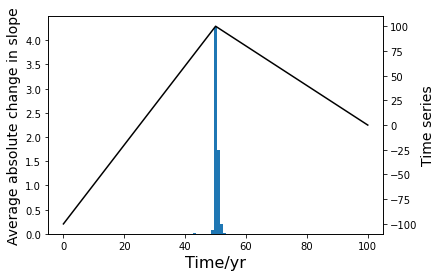

In [44]:
plt.figure()
fac = (NSAMPLE-burn_in)/THIN
left_edges = time_intervals_edges[:time_intervals_nbins] # use the left edges
ax = plt.gca()
plt.bar(left_edges[5:-5], av_delta_slope[5:-5], align='edge', width = time_intervals_edges[1] - time_intervals_edges[0])
ax2 = ax.twinx()
plt.plot([0,50,100],[-100,100,0],'k');
ax.set_xlabel('Time/yr',fontsize=16)
ax.set_ylabel('Average absolute change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)
plt.savefig('example1_jerk_av_slope.pdf',bbox_inches='tight')

#### For this example, the binned absolute change of slope works similarly to the absolute change of slope of the averaged model.

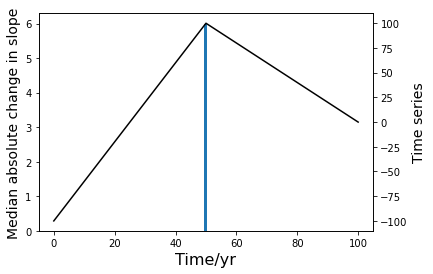

In [46]:
plt.figure()
fac = (NSAMPLE-burn_in)/THIN
left_edges = time_intervals_edges[:time_intervals_nbins] # use the left edges
ax = plt.gca()
plt.bar(left_edges[5:-5], median_delta_slope[5:-5], align='edge', width = time_intervals_edges[1] - time_intervals_edges[0])
ax2 = ax.twinx()
plt.plot([0,50,100],[-100,100,0],'k');
ax.set_xlabel('Time/yr',fontsize=16)
ax.set_ylabel('Median absolute change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)
plt.savefig('example1_jerk_median_slope.pdf',bbox_inches='tight')

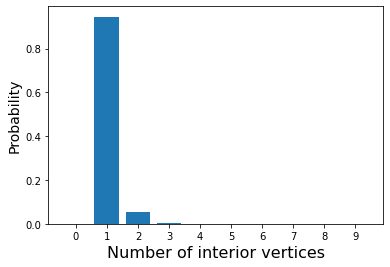

In [47]:
# Plot histogram of number of vertices
plt.figure()
plt.bar(np.arange(0,10),N_CP_hist[0:10]/np.sum(N_CP_hist),align='center',tick_label=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Number of interior vertices',fontsize=16)
plt.ylabel('Probability',fontsize=14)
plt.savefig('example1_number_vertices.pdf',bbox_inches='tight')

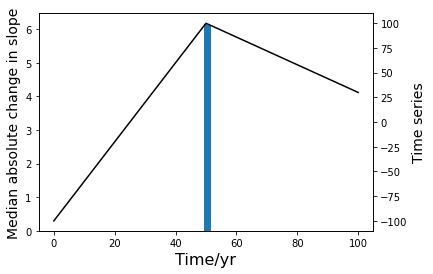

In [48]:
plt.figure()
fac = (NSAMPLE-burn_in)/THIN
left_edges = time_intervals_edges[:time_intervals_nbins] # use the left edges
ax = plt.gca()
plt.bar(left_edges[5:-5], upper_credible_delta_slope[5:-5], align='edge', width = time_intervals_edges[1] - time_intervals_edges[0])
ax2 = ax.twinx()
plt.plot([0,50,100],[-100,100,30],'k');
ax.set_xlabel('Time/yr',fontsize=16)
ax.set_ylabel('Median absolute change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)
plt.savefig('example1_jerk_credible_slope.pdf',bbox_inches='tight')

In [ ]:
# If the scatter in the data is too large, we need to take some care with using the median of the change in slope. 
# Suppose we have N models.  If each model has a single change point, then there are N changepoints overall.
# Using a single bin over the whole time period, all N values of the change in slope in this bin are nonzero. Thus the median is nonzero.

# However, suppose we now use more bins over the time period, such that the probable period of the jerk is spanned by (say) 4 bins.
# Then N values of the changes in slope need to be allocated between 4 bins, with the remaining values being zeros.
# Thus (on average) 75% of the values in each bin will be zero, so the median is zero.

# In the above example, there was an error of 5 in the vertical coordinate, and the change in slope is 6, indicating that very roughly the error in the x-coordinate is about 1.
# This is commensurate with a bin size of 1yr.



In [ ]:
# If we increase the error to 10 in the vertical, the size of the bins becomes too small for the width of the distribution of the jerk timing, and we get zeros in the median.
# The solution is to increase the width of the bins.

# This means that the bin width must be enough to encompass the ensemble of slope changes, and cannot therefore itself easily be used to determine the details of onset timing.
# However, it can be used to quantify the strength of a jerk

In [50]:
delta_Y = 10 * np.ones(NUM_DATA)

import os
import sys
sys.path.append( os.path.abspath('..') )
sys.path.append( os.path.abspath('.') )
from jerks import jerks
import numpy as np

# Define parameters for method:

Y_MIN = -200
Y_MAX = 200

TIMES_MIN = 0.0
TIMES_MAX = 100.0
K_MIN = 0
K_MAX = 100
sigmas = np.array([10,5,10],dtype = float)

# sigma_change_value = sigmas(1)
# sigma_move = sigmas(2)
# sigma_birth = sigmas(3)

THIN = 100
NBINS = 1000
credible = 95
RUNNING_MODE = 1
burn_in = 10000
NSAMPLE = 1000000+burn_in
time_intervals_nbins = 101  #collect change point histogram over 101 bins for the 100 time units, f
#[-0.5,0.5], ....[99.5, 100.5]
time_intervals_edges = np.linspace(TIMES_MIN-0.5, TIMES_MAX+0.5, time_intervals_nbins+1, endpoint = True)

# define spaces for outputs
Acceptance_rates=np.zeros(4)
AV = np.zeros(discretise_size,dtype=float)
SUP = np.zeros(discretise_size,dtype=float)
INF = np.zeros(discretise_size,dtype=float)
MEDIAN = np.zeros(discretise_size,dtype=float)
MODE = np.zeros(discretise_size,dtype=float)
MARGINAL_DENSITY = np.zeros( (discretise_size,NBINS),dtype=float )
N_CP_hist = np.zeros( K_MAX, dtype=int)
av_delta_slope = np.zeros( time_intervals_nbins,dtype=float )
median_delta_slope = np.zeros( time_intervals_nbins,dtype=float )
upper_credible_delta_slope = np.zeros( time_intervals_nbins,dtype=float )
lower_credible_delta_slope = np.zeros( time_intervals_nbins,dtype=float )

CP = np.zeros( time_intervals_nbins, dtype=int )

(Acceptance_rates, SUP, INF, AV, MEDIAN, MODE, CP, av_delta_slope, 
median_delta_slope, upper_credible_delta_slope, lower_credible_delta_slope, 
MARGINAL_DENSITY, N_CP_hist) = jerks.rjmcmc(
 sigmas=sigmas, burn_in=burn_in, 
 nsample=NSAMPLE, num_data=NUM_DATA, times=TIMES, y=Y, delta_y=delta_Y, 
 y_min=Y_MIN, y_max=Y_MAX, times_min=TIMES_MIN, times_max=TIMES_MAX, k_min=K_MIN, 
 k_max=K_MAX, discretise_size=discretise_size, time_intervals_nbins = time_intervals_nbins,time_intervals_edges = time_intervals_edges,
 thin=THIN, nbins=NBINS, credible=credible, running_mode=RUNNING_MODE)

print('Acceptance rates should ideally be 10-40%')
print(Acceptance_rates)

Acceptance rates should ideally be 10-40%
[26.90480042 14.40167618  2.94721913  2.94735956]


In [52]:
median_delta_slope[5:-5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [57]:
delta_Y = 10 * np.ones(NUM_DATA)

import os
import sys
sys.path.append( os.path.abspath('..') )
sys.path.append( os.path.abspath('.') )
from jerks import jerks
import numpy as np

# Define parameters for method:

Y_MIN = -200
Y_MAX = 200

TIMES_MIN = 0.0
TIMES_MAX = 100.0
K_MIN = 0
K_MAX = 100
sigmas = np.array([10,5,10],dtype = float)

# sigma_change_value = sigmas(1)
# sigma_move = sigmas(2)
# sigma_birth = sigmas(3)

THIN = 100
NBINS = 1000
credible = 95
RUNNING_MODE = 1
burn_in = 10000
NSAMPLE = 1000000+burn_in
time_intervals_nbins = 51  #collect change point histogram over 101 bins for the 100 time units, f
time_intervals_edges = np.linspace(TIMES_MIN-1, TIMES_MAX+1, time_intervals_nbins+1, endpoint = True)

# define spaces for outputs
Acceptance_rates=np.zeros(4)
AV = np.zeros(discretise_size,dtype=float)
SUP = np.zeros(discretise_size,dtype=float)
INF = np.zeros(discretise_size,dtype=float)
MEDIAN = np.zeros(discretise_size,dtype=float)
MODE = np.zeros(discretise_size,dtype=float)
MARGINAL_DENSITY = np.zeros( (discretise_size,NBINS),dtype=float )
N_CP_hist = np.zeros( K_MAX, dtype=int)
av_delta_slope = np.zeros( time_intervals_nbins,dtype=float )
median_delta_slope = np.zeros( time_intervals_nbins,dtype=float )
upper_credible_delta_slope = np.zeros( time_intervals_nbins,dtype=float )
lower_credible_delta_slope = np.zeros( time_intervals_nbins,dtype=float )

CP = np.zeros( time_intervals_nbins, dtype=int )

(Acceptance_rates, SUP, INF, AV, MEDIAN, MODE, CP, av_delta_slope, 
median_delta_slope, upper_credible_delta_slope, lower_credible_delta_slope, 
MARGINAL_DENSITY, N_CP_hist) = jerks.rjmcmc(
 sigmas=sigmas, burn_in=burn_in, 
 nsample=NSAMPLE, num_data=NUM_DATA, times=TIMES, y=Y, delta_y=delta_Y, 
 y_min=Y_MIN, y_max=Y_MAX, times_min=TIMES_MIN, times_max=TIMES_MAX, k_min=K_MIN, 
 k_max=K_MAX, discretise_size=discretise_size, time_intervals_nbins = time_intervals_nbins,time_intervals_edges = time_intervals_edges,
 thin=THIN, nbins=NBINS, credible=credible, running_mode=RUNNING_MODE)

print('Acceptance rates should ideally be 10-40%')
print(Acceptance_rates)

Acceptance rates should ideally be 10-40%
[26.90480042 14.40167618  2.94721913  2.94735956]


<Figure size 432x288 with 0 Axes>

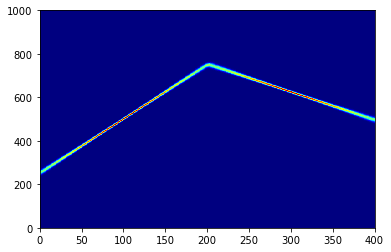

In [67]:
plt.figure()
fig, ax = plt.subplots()

c = ax.pcolormesh(MARGINAL_DENSITY.T, cmap='jet')

#### Histogram of vertex probability with original time series. The vertical scale indicates the probability that an internal vertex is in each (1 time unit) bin:

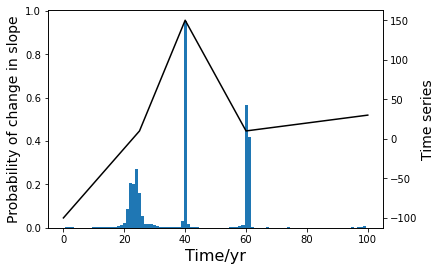

In [ ]:
# Binning in code:
# bins are 0-1, 1-2, 2-3, 3-4, etc. with left edges at 0,1,2,3,4,...
# 
fig, ax = plt.subplots(1)
fac = (NSAMPLE-burn_in)/THIN
left_edges = time_intervals_edges[:time_intervals_nbins] # use the left edges
plt.bar(left_edges, CP_hist/fac, align='edge', 
        width  = time_intervals_edges[1:] - time_intervals_edges[0:time_intervals_nbins])
ax2 = ax.twinx()
plt.plot([0,25,40,60,100],[-100,10,150,10,30],'k');
ax.set_xlabel('Time/yr',fontsize=16)
ax.set_ylabel('Probability of change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)
plt.savefig('example2_jerk_timing.pdf',bbox_inches='tight')

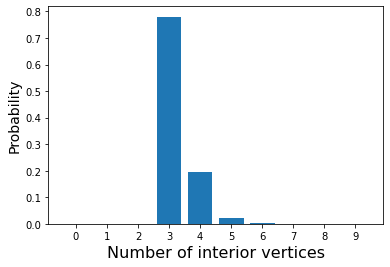

In [6]:
plt.figure()
plt.bar(np.arange(0,10),N_CP_hist[0:10]/np.sum(N_CP_hist),align='center',tick_label=[0,1,2,3,4,5,6,7,8,9])
plt.xlabel('Number of interior vertices',fontsize=16)
plt.ylabel('Probability',fontsize=14)
plt.savefig('example2_number_vertices.pdf',bbox_inches='tight')

In [6]:
from scipy.signal import find_peaks
peaks,_ = find_peaks(CP_hist/fac, height=0.1)
for p in peaks:
    print('Most probable change in slope is between {0:f} and {1:f}'.
      format(left_edges[p], left_edges[p+1]))

Most probable change in slope is between 21.500000 and 22.500000
Most probable change in slope is between 23.500000 and 24.500000
Most probable change in slope is between 39.500000 and 40.500000
Most probable change in slope is between 59.500000 and 60.500000


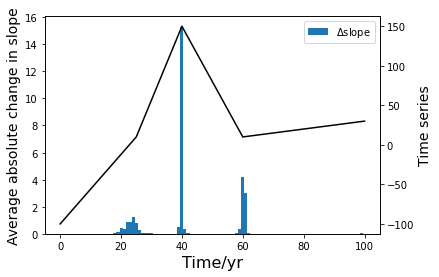

In [7]:
# Bin by sum of abs delta slopes:
# 
fig,ax1 = plt.subplots(1)
fac = (NSAMPLE-burn_in)/THIN
left_edges = time_intervals_edges[:time_intervals_nbins] # use the left edges
ax1 = plt.gca()
plt.bar(left_edges, delta_slope, align='edge', 
        width = time_intervals_edges[1:] - time_intervals_edges[0:time_intervals_nbins],
        label=r'$\Delta$slope')
ax2 = ax1.twinx()
ax2.plot([0,25,40,60,100],[-100,10,150,10,30],'k',label="True timeseries");
ax1.set_xlabel('Time/yr',fontsize=16)
ax1.set_ylabel('Average absolute change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)

# Plot actual change in slope
delta = 1e-6
TIMES2 = np.array([25,40,60])
Y0 = np.interp(TIMES2-delta,[0,25,40,60,100],[-100,10,150,10,30])
Y1 = np.interp(TIMES2,[0,25,40,60,100],[-100,10,150,10,30])
Y2 = np.interp(TIMES2+delta,[0,25,40,60,100],[-100,10,150,10,30])
slope2= (Y2-Y1)/delta
slope1 = (Y1-Y0)/delta
#ax1.plot(TIMES2, abs(slope2-slope1),'bs',label=r'Actual $\Delta$slope')
ax1.legend()


plt.savefig('example2_jerk_timing_delta_slope.pdf',bbox_inches='tight')

#### Find jerks by the gradient of the average:

In [10]:
def calc_delta_slope(timeseries, delta_t):
    delta_slope = np.zeros( len(timeseries) )
    
    for i in range(len(timeseries)):
        if i > 2 and i < len(timeseries)-2 :
            delta_slope[i] = abs(timeseries[i+2] -  timeseries[i+1] - timeseries[i-1] + timeseries[i-2] )/delta_t
    return delta_slope

Peak of delta_slope for median 15.840000
Peak of delta_slope for average 15.654604
Time of max delta_slope for median 39.393939
Time of max delta_slope for average 40.404040


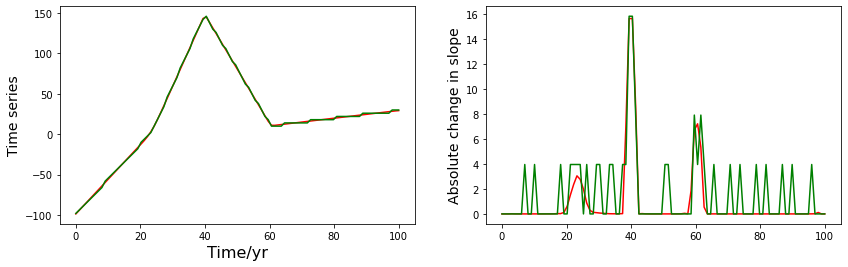

In [11]:

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

true_soln = np.interp(time_for_plotting,[0,50,100],[-100,100,30])
ax1.plot(time_for_plotting, AV,'r') 
ax1.plot(time_for_plotting, MEDIAN,'g') 

ax2.plot(time_for_plotting, calc_delta_slope(AV,time_for_plotting[1] - time_for_plotting[0]),'r') 
ax2.plot(time_for_plotting, calc_delta_slope(MEDIAN,time_for_plotting[1] - time_for_plotting[0]),'g') 

ax1.set_xlabel('Time/yr',fontsize=16)
ax1.set_ylabel('Time series',fontsize=14)
ax2.set_ylabel('Absolute change in slope',fontsize=14)
#plt.savefig('example1_jerk_delta_slope.pdf',bbox_inches='tight')

print( 'Peak of delta_slope for median {0:f}'.format(calc_delta_slope(MEDIAN,time_for_plotting[1] - time_for_plotting[0]).max() ))
print( 'Peak of delta_slope for average {0:f}'.format(calc_delta_slope(AV,time_for_plotting[1] - time_for_plotting[0]).max() ))

print( 'Time of max delta_slope for median {0:f}'.format(time_for_plotting[calc_delta_slope(MEDIAN,time_for_plotting[1] - time_for_plotting[0]).argmax()]))
print( 'Time of max delta_slope for average {0:f}'.format(time_for_plotting[calc_delta_slope(AV,time_for_plotting[1] - time_for_plotting[0]).argmax()]))


In [13]:
from scipy.signal import find_peaks
peaks,_ = find_peaks(calc_delta_slope(AV,time_for_plotting[1] - time_for_plotting[0]), height=1)
for p in peaks:
    print('Most probable change in slope is {0:f}'.
      format(time_for_plotting[p]))

Most probable change in slope is 23.232323
Most probable change in slope is 40.404040
Most probable change in slope is 60.606061


#### Larger bins

In [8]:
import os
import sys
sys.path.append( os.path.abspath('..') )
from jerks import jerks
import numpy as np

# Define parameters for method:

Y_MIN = -200
Y_MAX = 200
discretise_size = 100

TIMES_MIN = 0.0
TIMES_MAX = 100.0
K_MIN = 0
K_MAX = 100
sigmas = np.array([10,5,10],dtype = float)

# sigma_change_value = sigmas(1)
# sigma_move = sigmas(2)
# sigma_birth = sigmas(3)

THIN = 100
NBINS = 100
credible = 95
RUNNING_MODE = 1
burn_in = 10000
NSAMPLE = 2000000+burn_in
time_intervals_nbins = 9  #collect change point histogram over 101 bins for the 100 time units, f
#[0.5,1.5], ....[98.5, 99.5]
time_intervals_edges = np.linspace(TIMES_MIN+0.5, TIMES_MAX-0.5, time_intervals_nbins+1, endpoint = True)

# define spaces for outputs
Acceptance_rates=np.zeros(4)
AV = np.zeros(discretise_size,dtype=float)
SUP = np.zeros(discretise_size,dtype=float)
INF = np.zeros(discretise_size,dtype=float)
MEDIAN = np.zeros(discretise_size,dtype=float)
MODE = np.zeros(discretise_size,dtype=float)
CP_hist = np.zeros( time_intervals_nbins,dtype=int )
MARGINAL_DENSITY = np.zeros( (discretise_size,NBINS),dtype=float )
N_CP_hist = np.zeros( K_MAX-K_MIN+1, dtype=int)
delta_slope = np.zeros( time_intervals_nbins,dtype=int )

(Acceptance_rates, SUP, INF,AV, MEDIAN, MODE, CP_hist,delta_slope, MARGINAL_DENSITY, N_CP_hist) = jerks.rjmcmc(
 sigmas=sigmas, burn_in=burn_in, 
 nsample=NSAMPLE, num_data=NUM_DATA, times=TIMES, y=Y, delta_y=delta_Y, 
 y_min=Y_MIN, y_max=Y_MAX, times_min=TIMES_MIN, times_max=TIMES_MAX, k_min=K_MIN, 
 k_max=K_MAX, discretise_size=discretise_size, time_intervals_nbins = time_intervals_nbins,time_intervals_edges = time_intervals_edges,
 thin=THIN, nbins=NBINS, credible=credible, running_mode=RUNNING_MODE)


print('Acceptance rates should ideally be 10-40%')
print(Acceptance_rates)

Acceptance rates should ideally be 10-40%
[18.01070023  6.39791489  2.44849229  2.45188308]


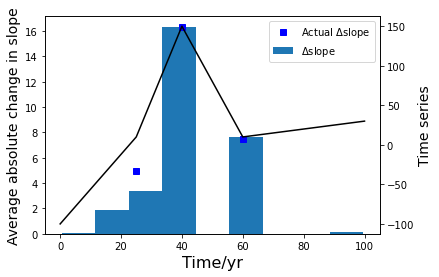

In [9]:
# Bin by sum of abs delta slopes:
# 
fig,ax1 = plt.subplots(1)
fac = (NSAMPLE-burn_in)/THIN
left_edges = time_intervals_edges[:time_intervals_nbins] # use the left edges
ax1 = plt.gca()
plt.bar(left_edges, delta_slope, align='edge', 
        width = time_intervals_edges[1:] - time_intervals_edges[0:time_intervals_nbins],
        label=r'$\Delta$slope')
ax2 = ax1.twinx()
ax2.plot([0,25,40,60,100],[-100,10,150,10,30],'k',label="True timeseries");
ax1.set_xlabel('Time/yr',fontsize=16)
ax1.set_ylabel('Average absolute change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)

# Plot actual change in slope
delta = 1e-6
TIMES2 = np.array([25,40,60])
Y0 = np.interp(TIMES2-delta,[0,25,40,60,100],[-100,10,150,10,30])
Y1 = np.interp(TIMES2,[0,25,40,60,100],[-100,10,150,10,30])
Y2 = np.interp(TIMES2+delta,[0,25,40,60,100],[-100,10,150,10,30])
slope2= (Y2-Y1)/delta
slope1 = (Y1-Y0)/delta
ax1.plot(TIMES2, abs(slope2-slope1),'bs',label=r'Actual $\Delta$slope')
ax1.legend()



#### Non uniform bins

In [60]:
import os
import sys
sys.path.append( os.path.abspath('..') )
from jerks import jerks
import numpy as np

# Define parameters for method:

Y_MIN = -200
Y_MAX = 200
discretise_size = 100

TIMES_MIN = 0.0
TIMES_MAX = 100.0
K_MIN = 0
K_MAX = 100
sigmas = np.array([10,5,10],dtype = float)

# sigma_change_value = sigmas(1)
# sigma_move = sigmas(2)
# sigma_birth = sigmas(3)

THIN = 100
NBINS = 100
credible = 95
RUNNING_MODE = 1
burn_in = 10000
NSAMPLE = 2000000+burn_in

time_intervals_edges = np.array([0,10,15,25,50,52,58,65,75,90,100])
time_intervals_nbins = time_intervals_edges.shape[0]-1  

# define spaces for outputs
Acceptance_rates=np.zeros(4)
AV = np.zeros(discretise_size,dtype=float)
SUP = np.zeros(discretise_size,dtype=float)
INF = np.zeros(discretise_size,dtype=float)
MEDIAN = np.zeros(discretise_size,dtype=float)
MODE = np.zeros(discretise_size,dtype=float)
CP_hist = np.zeros( time_intervals_nbins,dtype=int )
MARGINAL_DENSITY = np.zeros( (discretise_size,NBINS),dtype=float )
N_CP_hist = np.zeros( K_MAX-K_MIN+1, dtype=int)
delta_slope = np.zeros( time_intervals_nbins,dtype=int )

(Acceptance_rates, SUP, INF,AV, MEDIAN, MODE, CP_hist,delta_slope, MARGINAL_DENSITY, N_CP_hist) = jerks.rjmcmc(
 sigmas=sigmas, burn_in=burn_in, 
 nsample=NSAMPLE, num_data=NUM_DATA, times=TIMES, y=Y, delta_y=delta_Y, 
 y_min=Y_MIN, y_max=Y_MAX, times_min=TIMES_MIN, times_max=TIMES_MAX, k_min=K_MIN, 
 k_max=K_MAX, discretise_size=discretise_size, time_intervals_nbins = time_intervals_nbins,time_intervals_edges = time_intervals_edges,
 thin=THIN, nbins=NBINS, credible=credible, running_mode=RUNNING_MODE)


print('Acceptance rates should ideally be 10-40%')
print(Acceptance_rates)



Acceptance rates should ideally be 10-40%
[18.13540077  6.42003679  2.50352526  2.50659227]


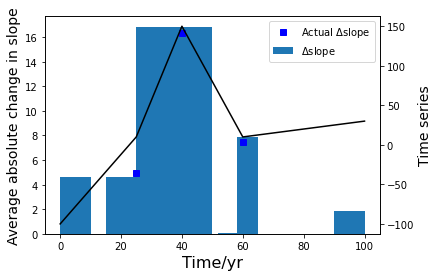

In [62]:
# Bin by sum of abs delta slopes:
# 
fig,ax1 = plt.subplots(1)
fac = (NSAMPLE-burn_in)/THIN
left_edges = time_intervals_edges[:time_intervals_nbins] # use the left edges
ax1 = plt.gca()
plt.bar(left_edges, delta_slope, align='edge', 
        width = time_intervals_edges[1:] - time_intervals_edges[0:time_intervals_nbins],
        label=r'$\Delta$slope')
ax2 = ax1.twinx()
ax2.plot([0,25,40,60,100],[-100,10,150,10,30],'k',label="True timeseries");
ax1.set_xlabel('Time/yr',fontsize=16)
ax1.set_ylabel('Average absolute change in slope',fontsize=14)
ax2.set_ylabel('Time series',fontsize=14)

# Plot actual change in slope
delta = 1e-6
TIMES2 = np.array([25,40,60])
Y0 = np.interp(TIMES2-delta,[0,25,40,60,100],[-100,10,150,10,30])
Y1 = np.interp(TIMES2,[0,25,40,60,100],[-100,10,150,10,30])
Y2 = np.interp(TIMES2+delta,[0,25,40,60,100],[-100,10,150,10,30])
slope2= (Y2-Y1)/delta
slope1 = (Y1-Y0)/delta
ax1.plot(TIMES2, abs(slope2-slope1),'bs',label=r'Actual $\Delta$slope')
ax1.legend()




In [ ]:
## Find the jerks, with their uncertainty in time:
Requires two parameters: $\gamma$ and $\tau$, set nominally to 10 and 0.05
#### Algorithm: 
1. Find a peak probability in (slope, time) space, using a 2D histogram. If the probability exceeds $\gamma$ times the average over the histogram, then the peak is significant. Denote the time $t_0$
2. Find the marginal probability (in time) for $t_0$ using the same binning in time, say $f(t_0)$
3. Using the marginal pdf in time, define the jerk window to be the largest contiguous temporal range including $t_0$ for which the pdf remains above $\tau f(t_0)$
4. Remove the jerk window from the dataset and repeat.

In [ ]:
marginal_counts, marginal_xedges  = np.histogram( jerk_data[0:size_jerk_data,0], bins=200, range=[0,100],density=True)
counts, xedges, yedges = np.histogram2d(jerk_data[0:size_jerk_data,0], jerk_data[0:size_jerk_data,1], bins=(200,100), range=[[0,100], [-30,30]],density=True)

tau = 0.05
gamma = 1000
jerk_count = 0
discovered_jerks = np.zeros( (4, 100), dtype =float) #predefine array for up to 1000 jerks

# Find the jerk uncertainty in time:
while counts.max() > gamma * counts.mean():
    print('Above threshold for jerk: max/mean of pdf {0:7.1f} before removal of jerk {1:d}'.format( counts.max() /  counts.mean(), jerk_count))
    indices = np.unravel_index(np.argmax(counts),counts.shape)   #indices contains the position of the maximum probability in the 2D histogram.
    min_jerk_time = marginal_xedges[0]
    max_jerk_time = marginal_xedges[-1]
    
    for i in range(indices[0],marginal_counts.shape[0]):  #count upwards in time to find when the jerk window ends
        if marginal_counts[i] < marginal_counts[indices[0]] * threshold:
            max_jerk_time = marginal_xedges[i]  #i here indicates the first bin which lies outside the jerk. The edge of the jerk is thus taken to be the left edge of this bin.
            max_index = i
            break
        
    for i in range(indices[0],0,-1):  # count downwards to find when the jerk window ends
        if marginal_counts[i] < marginal_counts[indices[0]] * threshold:
            min_jerk_time = marginal_xedges[i+1]  #i here indicates the first bin which lies outside the jerk. The edge of the jerk is thus taken to be the right edge of this bin.
            min_index = i
            break
    
    marginal_counts[min_index:max_index+1] = 0.0 #zero the counts for the jerk already discovered.
    counts[min_index:max_index+1,:] = 0.0
    
    # save the jerk time (which is the temporal mid point point of the bin), the uncertainty, and change in slope:
    discovered_jerks[:,jerk_count] = \
    0.5*(marginal_xedges[indices[0]] + marginal_xedges[indices[0]+1]), \
    min_jerk_time, max_jerk_time, 0.5*(yedges[indices[1]] + yedges[indices[1]+1])
    jerk_count += 1   
                
    if jerk_count == discovered_jerks.shape[1]:
        print('Maximum number of jerks discovered')
        break

print('Below threshold for jerk: max/mean of pdf {0:7.1f} after  removal of jerk {1:d}'.format( counts.max() /  counts.mean(), jerk_count))        
print('{0:d} jerks discovered'.format(jerk_count))
for i in range(jerk_count):
    print('Jerk : {0:d} occured at time {1:3.2f} with temporal range [{2:3.2f} : {3:3.2f}], delta slope {4:3.2f}'.\
    format(i, discovered_jerks[0,i], discovered_jerks[1,i], discovered_jerks[2,i], discovered_jerks[3,i]) )
